## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Mon Sep 11 04:19:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [6]:
!mkdir datasets
%cd datasets

# !pip install roboflow --quiet

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="oXSIFV4l23U7O7tXwugB")
# # project = rf.workspace("will-b-pha1m").project("football-players-detection-qqati")
# # dataset = project.version(1).download("yolov8")

# # from roboflow import Roboflow
# # rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oXSIFV4l23U7O7tXwugB")
project = rf.workspace("will-b-pha1m").project("wce_org")
dataset = project.version(2).download("yolov8")






/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Success

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wce_org-2 in yolov8:: 100%|██████████| 4936/4936 [00:00<00:00, 8778.37it/s]


## Custom Training

In [ ]:
# %cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 350MB/s]
New https://pypi.org/project/ultralytics/8.0.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/wce_org-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=Fa

In [ ]:
!zip -r file.zip /content/datasets

  adding: content/datasets/ (stored 0%)
  adding: content/datasets/yolov8s.pt (deflated 8%)
  adding: content/datasets/yolov8n.pt (deflated 9%)
  adding: content/datasets/runs/ (stored 0%)
  adding: content/datasets/runs/detect/ (stored 0%)
  adding: content/datasets/runs/detect/train/ (stored 0%)
  adding: content/datasets/runs/detect/train/train_batch4321.jpg (deflated 10%)
  adding: content/datasets/runs/detect/train/val_batch1_pred.jpg (deflated 14%)
  adding: content/datasets/runs/detect/train/labels.jpg (deflated 23%)
  adding: content/datasets/runs/detect/train/P_curve.png (deflated 15%)
  adding: content/datasets/runs/detect/train/args.yaml (deflated 51%)
  adding: content/datasets/runs/detect/train/F1_curve.png (deflated 18%)
  adding: content/datasets/runs/detect/train/train_batch4322.jpg (deflated 10%)
  adding: content/datasets/runs/detect/train/PR_curve.png (deflated 19%)
  adding: content/datasets/runs/detect/train/val_batch2_labels.jpg (deflated 13%)
  adding: content/da

In [ ]:
#save the model
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"datasets/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
!ls {HOME}/datasets/runs/detect/train/

args.yaml					    state_dict.pt
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1694424053.66ace7754642.1470.0  train_batch2.jpg
F1_curve.png					    train_batch4320.jpg
labels_correlogram.jpg				    train_batch4321.jpg
labels.jpg					    train_batch4322.jpg
model_artifacts.json				    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
roboflow_deploy.zip				    weights


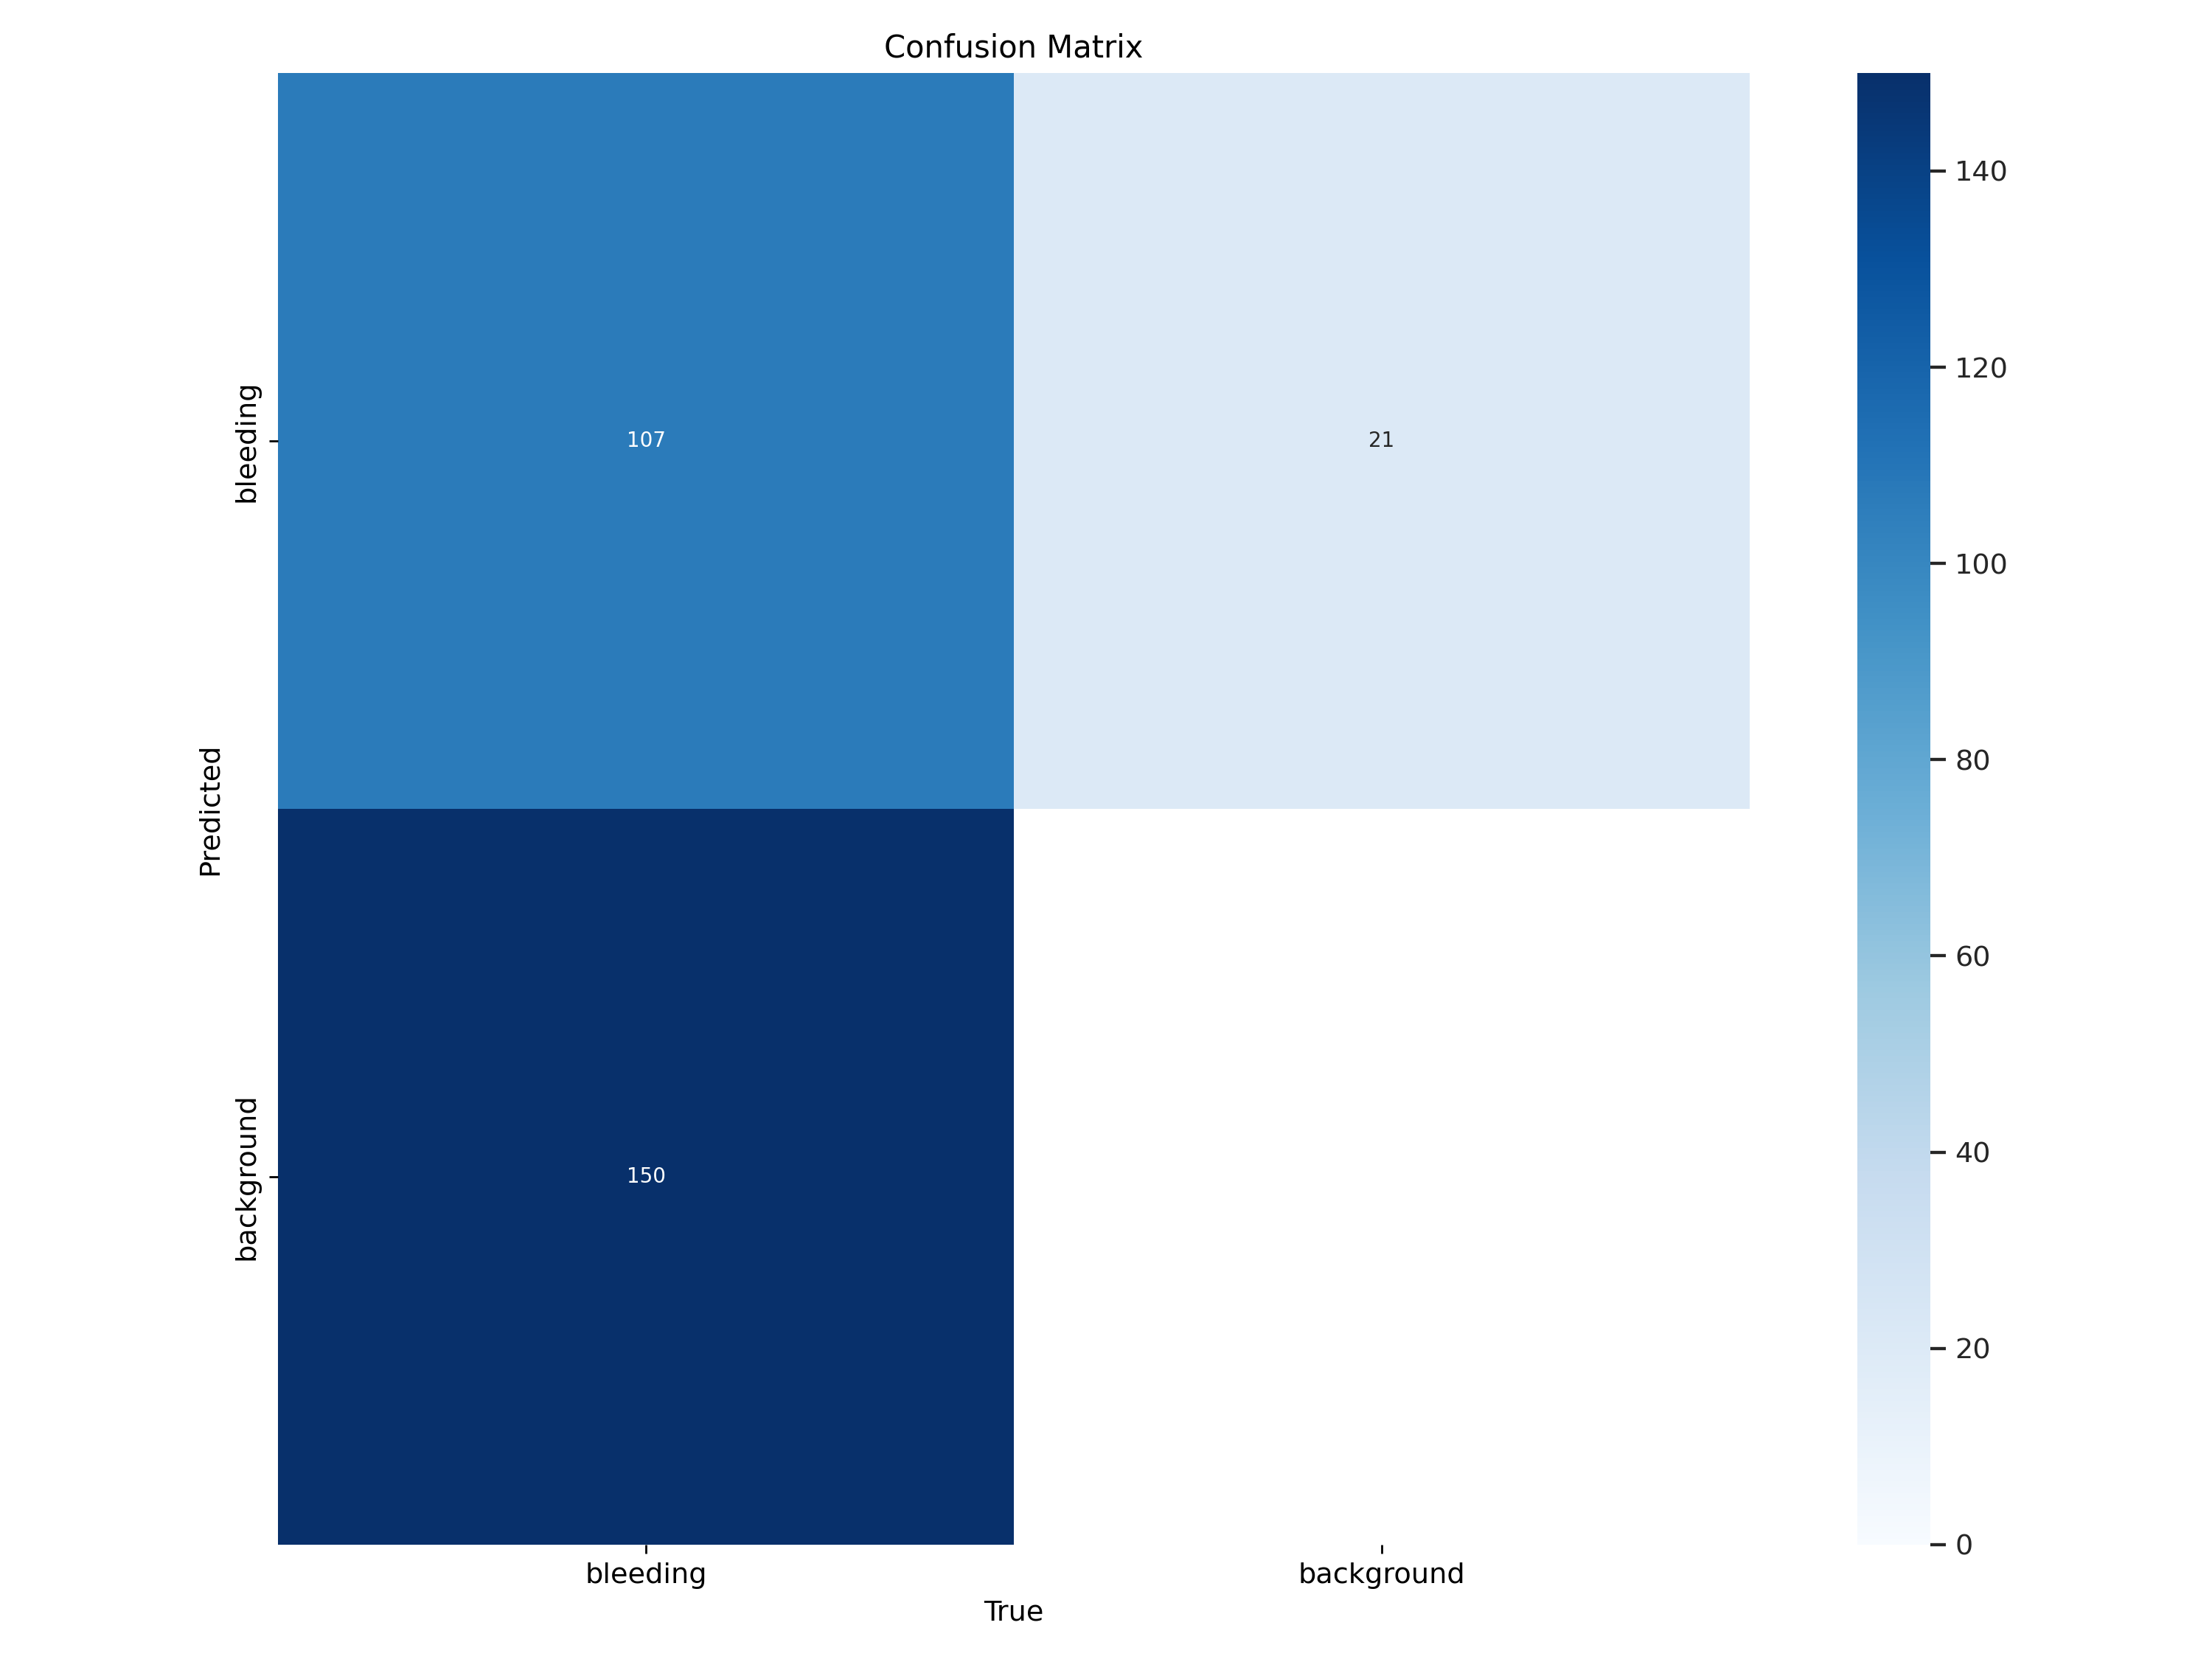

In [ ]:
# Image('datasets/runs/detect/train2/confusion_matrix.png')
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

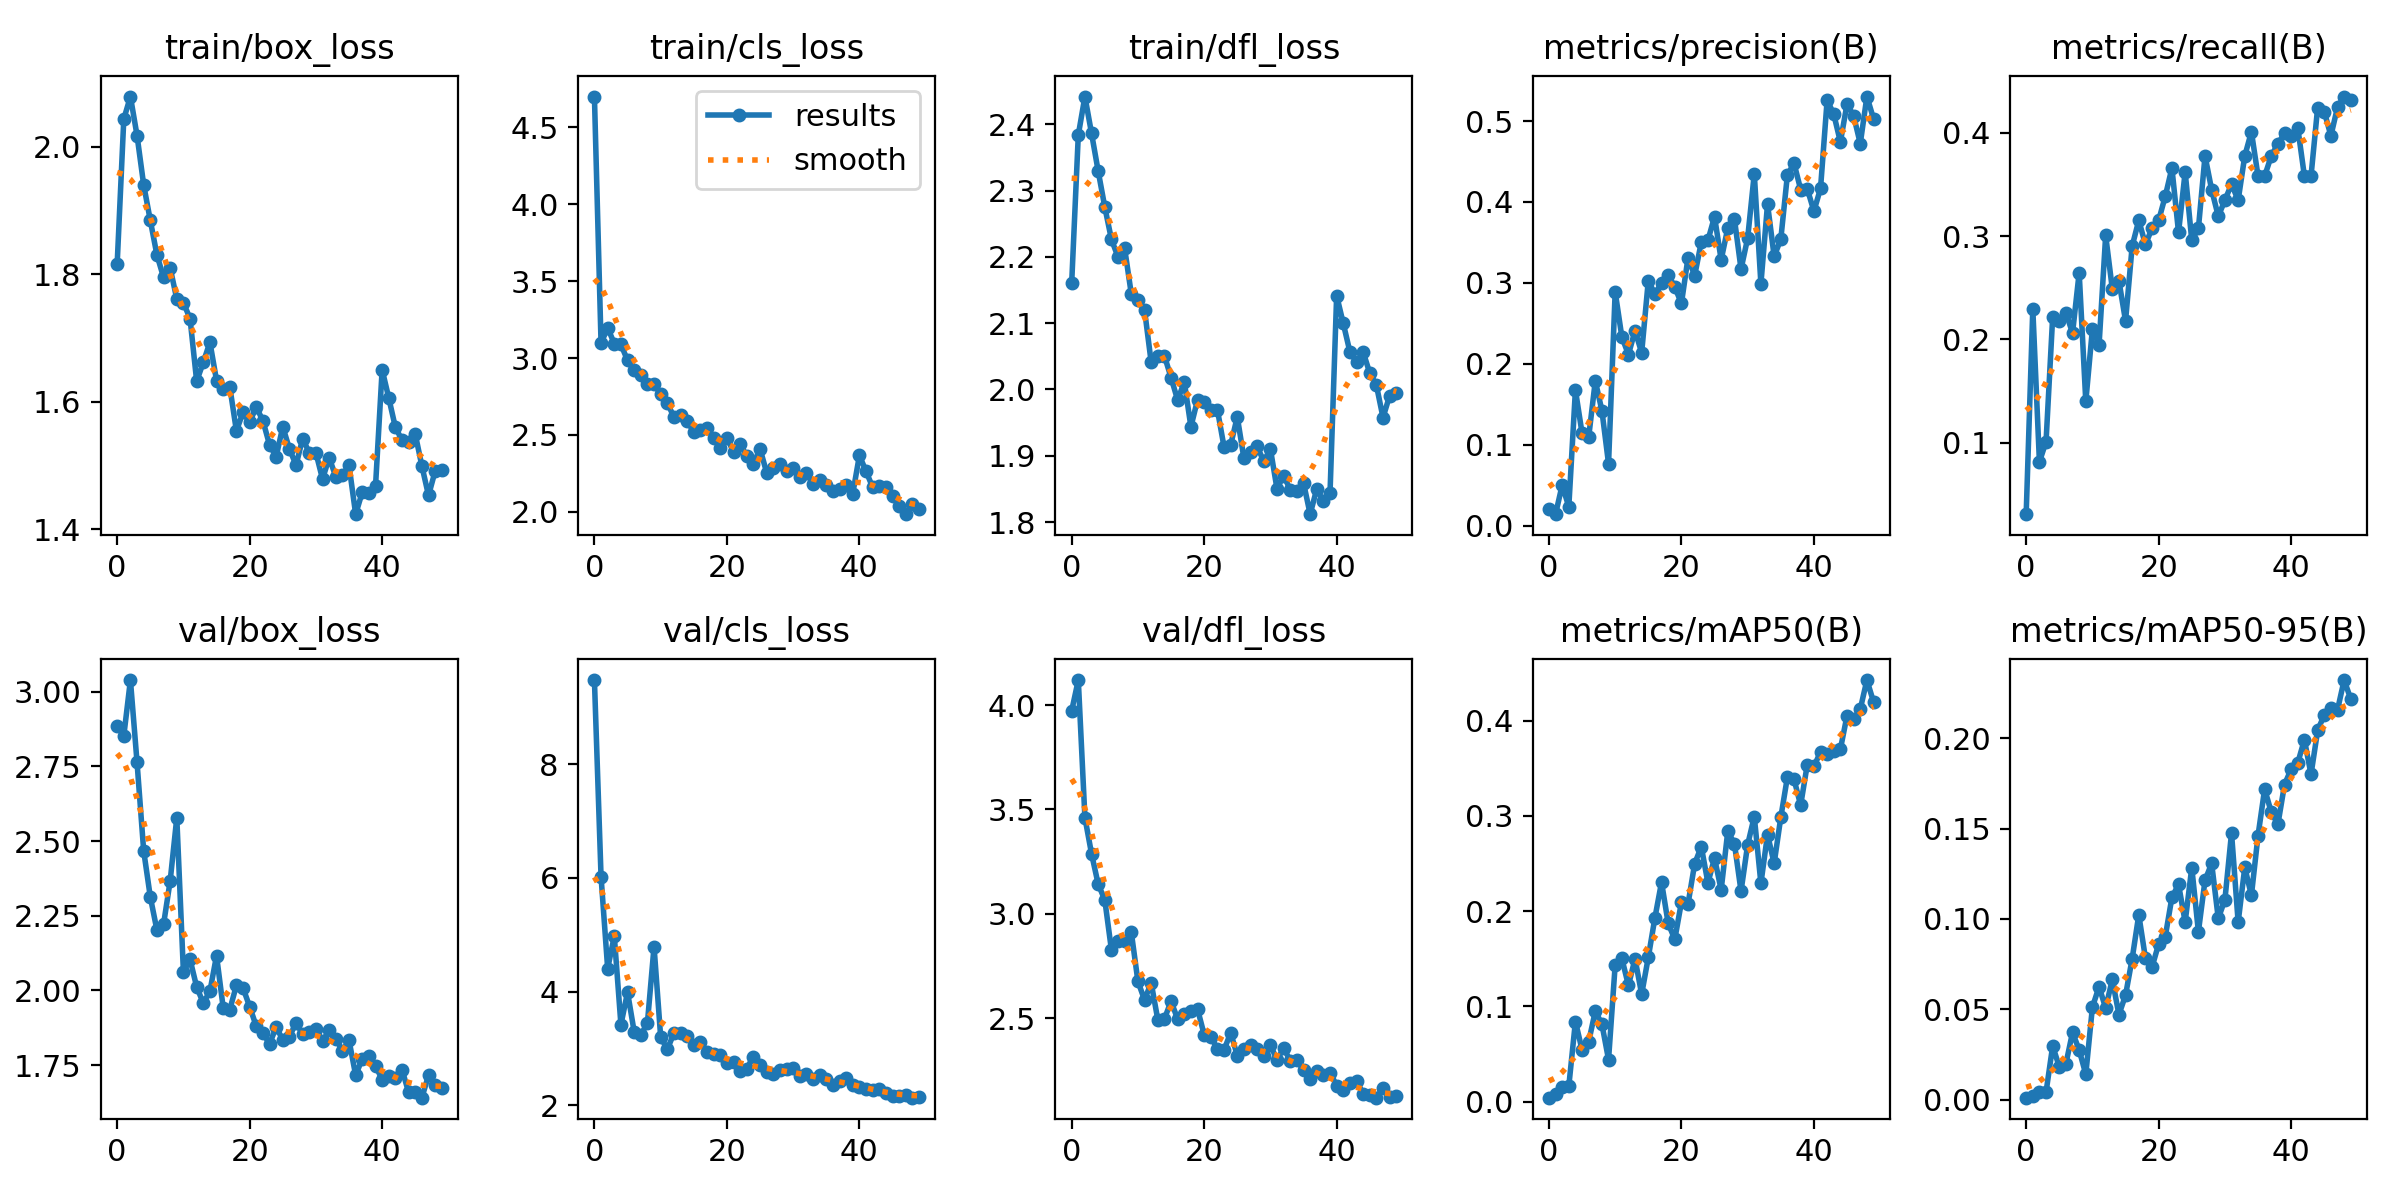

In [ ]:

Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

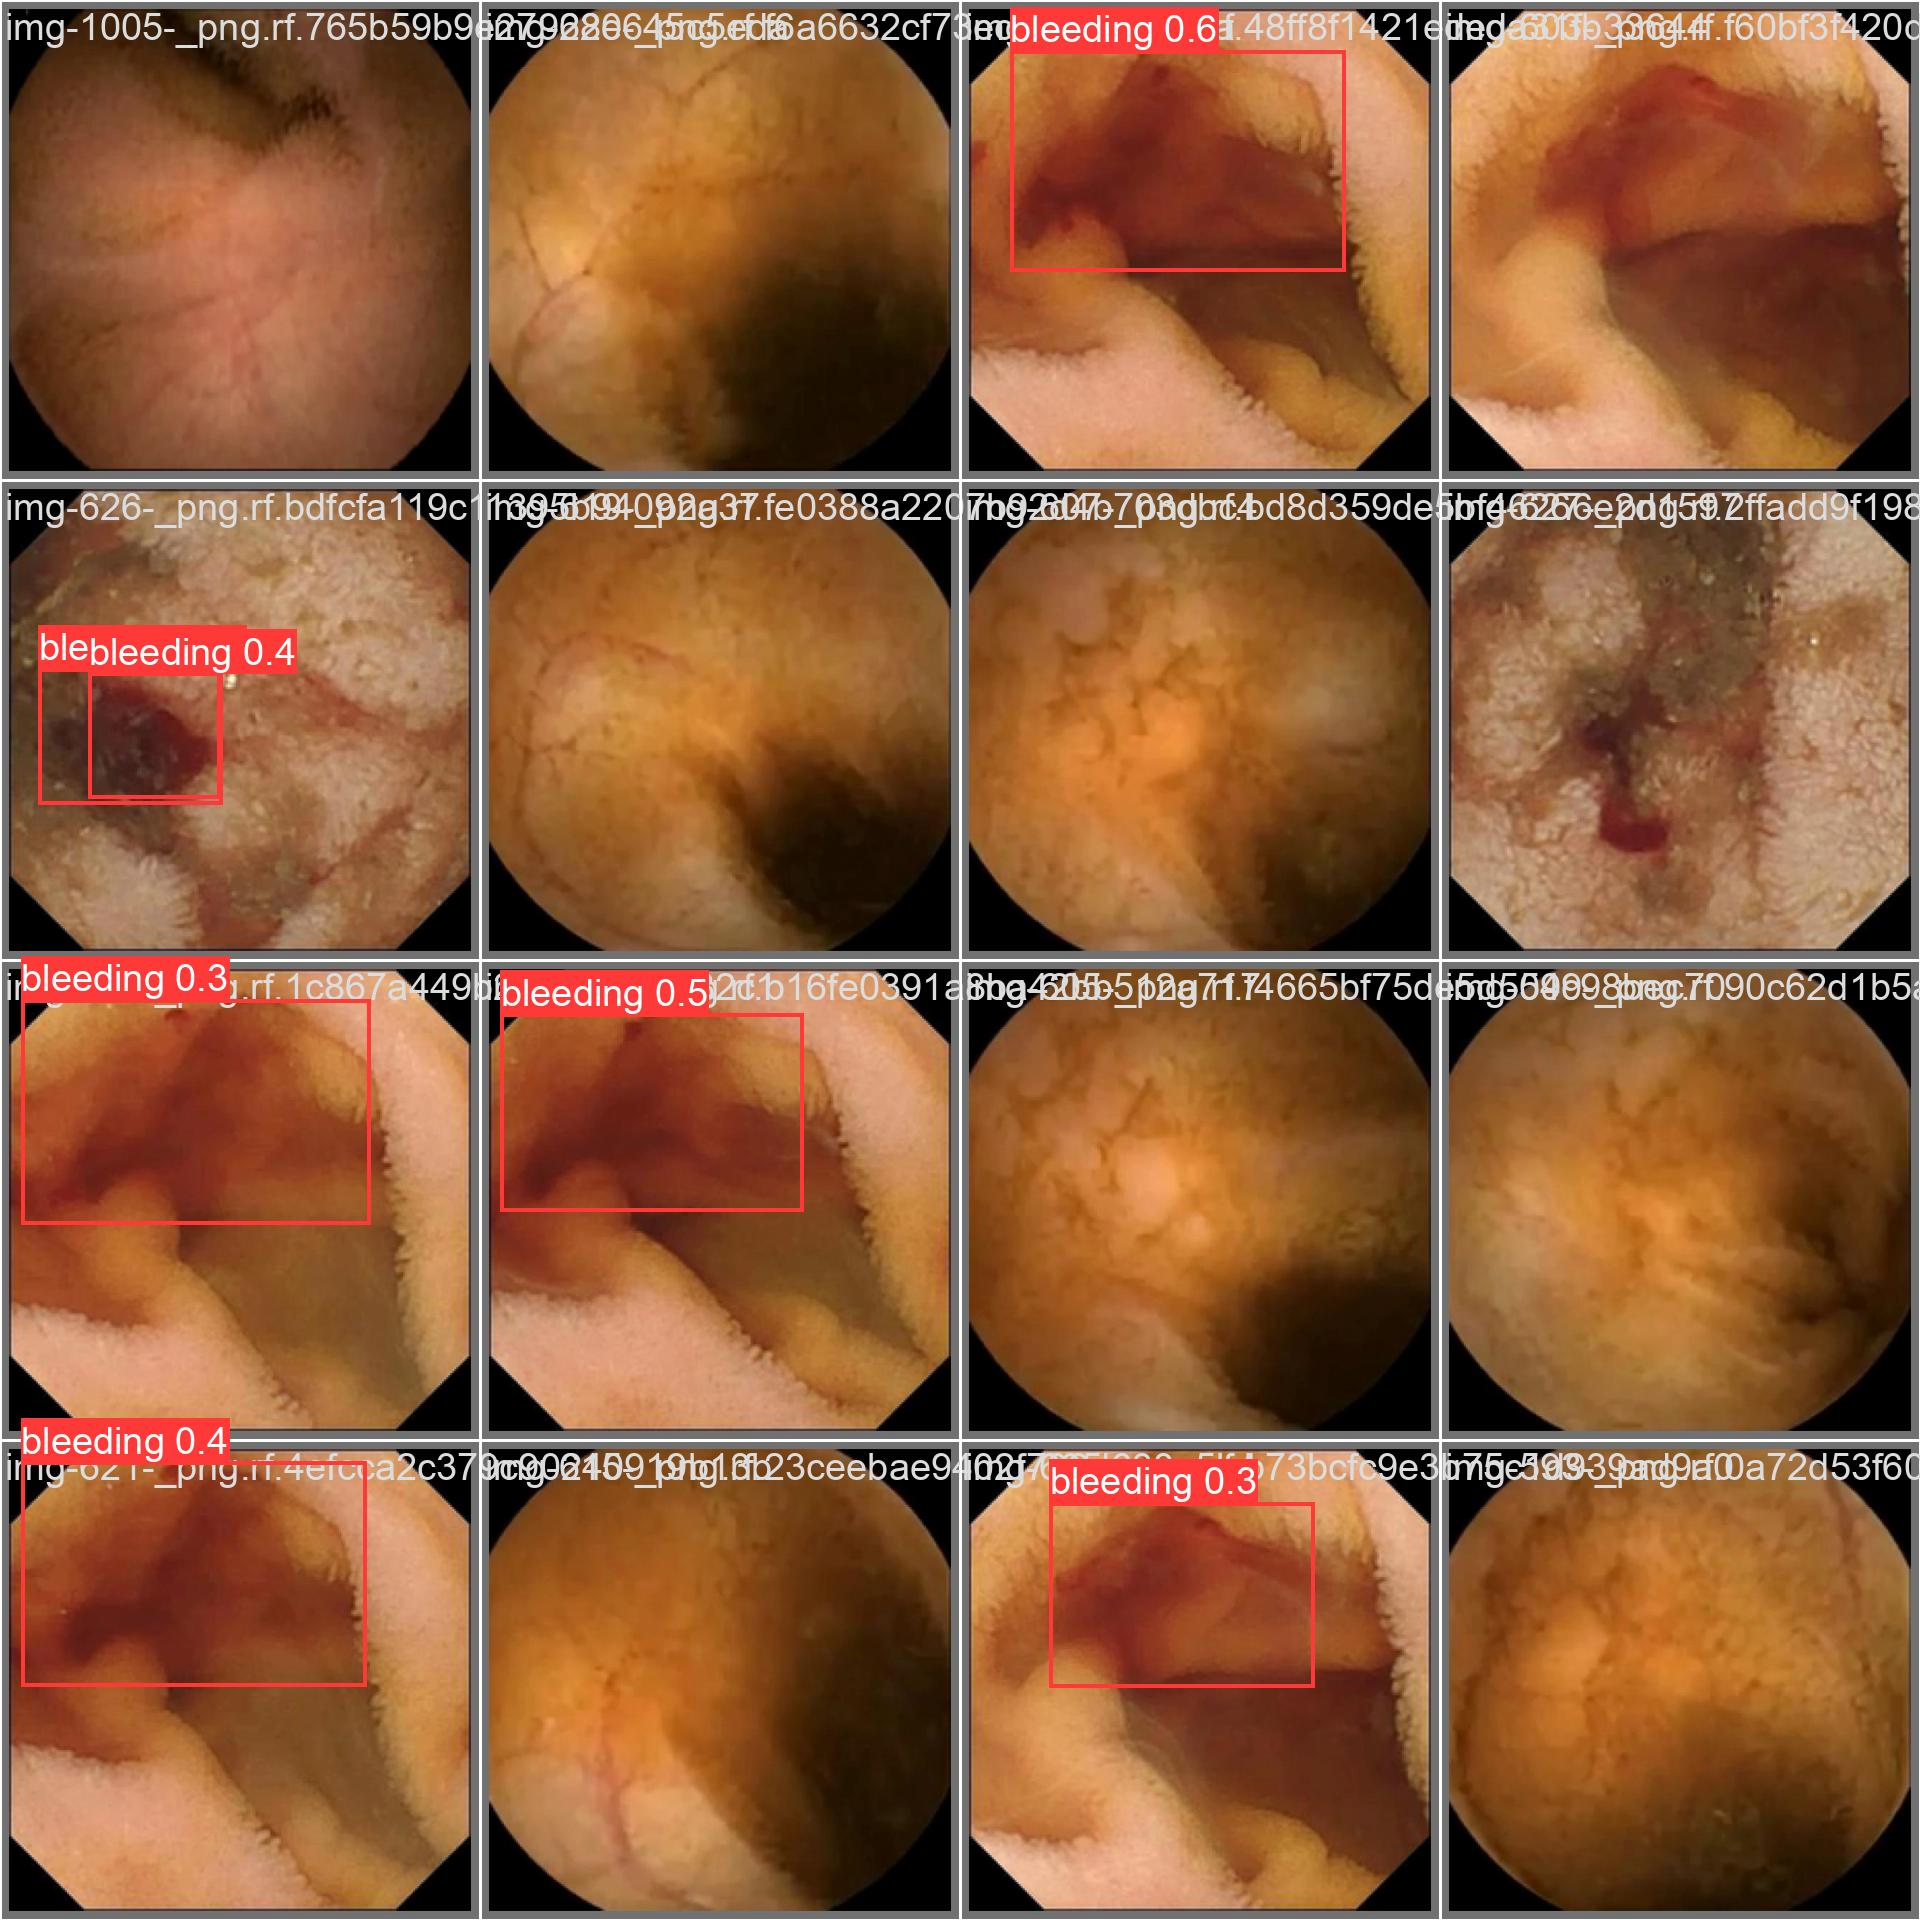

In [ ]:

Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch0_pred.jpg', width=600)




## Validate Custom Model

In [ ]:

!yolo task=detect mode=val model=/content/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/wce_org-2/valid/labels.cache... 490 images, 233 backgrounds, 0 corrupt: 100% 490/490 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:13<00:00,  2.35it/s]
                   all        490        257      0.528      0.434      0.442      0.232
Speed: 3.4ms preprocess, 13.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val


## Inference with Custom Model

In [ ]:

!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/245 /content/datasets/wce_org-2/test/images/img-10-_png.rf.4ac34470219163a2741bb0e5ed4f7fde.jpg: 800x800 (no detections), 24.7ms
image 2/245 /content/datasets/wce_org-2/test/images/img-1006-_png.rf.ec91c9f6e996c1837eb86c5847da0d51.jpg: 800x800 (no detections), 24.7ms
image 3/245 /content/datasets/wce_org-2/test/images/img-1007-_png.rf.02d276bbf007f90d23a89fd6ae12deed.jpg: 800x800 2 bleedings, 24.6ms
image 4/245 /content/datasets/wce_org-2/test/images/img-101-_png.rf.2b8cf019cfca3deaab73237d76568bcc.jpg: 800x800 (no detections), 24.6ms
image 5/245 /content/datasets/wce_org-2/test/images/img-1010-_png.rf.50e5ba9fd888fa5eba02181ad5f5b3d4.jpg: 800x800 (no detections), 24.6ms
image 6/245 /content/datasets/wce_org-2/test/images/img-1012-_png.rf.f96143310173181488cbf243a5586cf7.jpg: 800x800 (no detections), 24.6ms
image 7/245 /con

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'datasets/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/datasets/runs/detect/train/weights/best.pt    conf=0.25 source=/content/72210103826_20210824_00028.bmp  save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 380, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 107, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 156, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 578, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 518, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 791, in load
    with _open_file_like(f,


!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source=/content/messi_video.mp4 save=True

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
pip install ultralytics==8.0.134

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"datasets/runs/detect/train/")

FileNotFoundError: ignored

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.